In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
!../.g

[master 713bf19] web
 1 file changed, 199 insertions(+), 38 deletions(-)
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 4 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 83.85 KiB | 681.00 KiB/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/macbuse/macbuse.github.io
   3999d95..713bf19  master -> master


## The graph of $x \mapsto \sin(x)$

Matplotlib is used for plotting functions

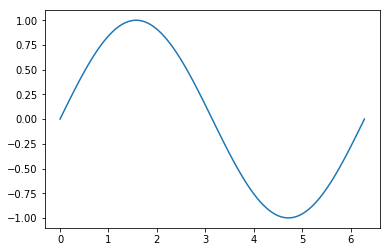

In [2]:
X = np.linspace(0, 2*np.pi, 100)
plt.plot(X, np.sin(X));

## Multiple curves

We can display the approximations to $\sin$
on the same plot like this



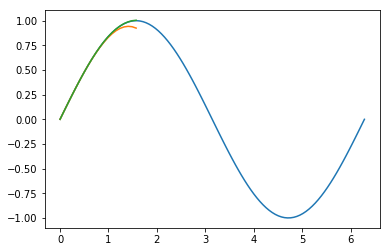

In [87]:
X = np.linspace(0, 2*np.pi, 100)
plt.plot(X, np.sin(X));

T = np.linspace(0,np.pi/2, 20)
Y = T - T**3/6 
plt.plot(T, Y)

Y = T - T**3/6 + T**5/120  
plt.plot(T, Y);

## Basic plot style

and we can 

- change the style of the curves 
by adding an argument like "rx"

- add labels for the axes


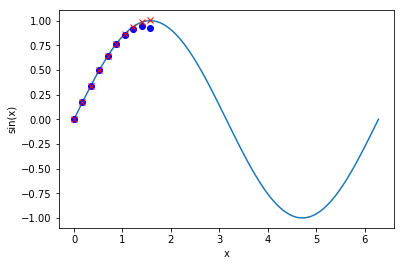

In [27]:
X = np.linspace(0, 2*np.pi, 100)
plt.plot(X, np.sin(X));

T = np.linspace(0,np.pi/2, 10)
Y = T - T**3/6 
plt.plot(T, Y,'bo')

Y = T - T**3/6 + T**5/120  
plt.plot(T, Y, 'rx');

plt.xlabel('x');
plt.ylabel('sin(x)');

## Adding legend

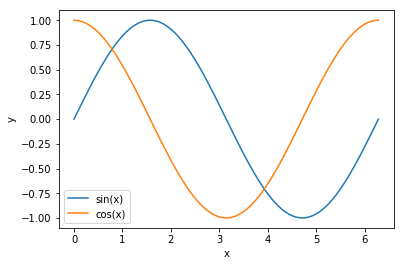

In [31]:
X = np.linspace(0, 2*np.pi, 100)
# add legend
plt.plot(X, np.sin(X),label='sin(x)');
plt.plot(X, np.cos(X), label='cos(x)');

plt.legend()
plt.xlabel('x');
plt.ylabel('y');

## More sophistocated - aspect ratio

This is how I would calculate the approximations.

- calculate an array (vector) of coefficients
- calculate a matrix of odd powers, a sort of Van der Monde matrix.
- do a matrix multiplication to get the values

Do you see why I take the interval $[0, \pi]$ ?

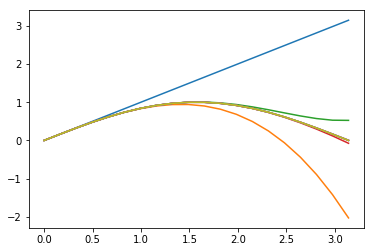

In [101]:
N = 10
T = np.linspace(0, np.pi, 20)

coeffs = [(-1)**(n+1) /np.math.factorial(2*n - 1) for n in range(1,N)]
odd_powers = np.stack([ T**(2*n - 1 ) for n in range(1,N)] )

for k in range(1,N):
    Y = np.dot( odd_powers[:k].T, coeffs[:k])
    plt.plot(T,Y)


## Problem of aspect ratio

- horizontal distance = $\pi/2$
- vertical distance = 5

but the width is bigger than the height.

We can fix this using `plt.subplots`

- the option we want is `ax.set_aspect('equal')`



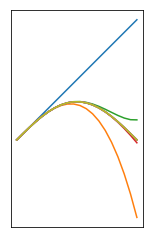

In [110]:
fig, ax = plt.subplots()

#fig.set_size_inches(8,8)
ax.set_aspect('equal')
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

for k in range(1,N):
    Y = np.dot( odd_powers[:k].T, coeffs[:k])
    #I have to change this from plt.plot
    ax.plot(T,Y)
    
# this saves the figure to a file
# fn always means *file name*
fn = './tt.png'
fig.savefig(fn)

## Exercise : animation


Try to get [this to work](https://matplotlib.org/gallery/animation/simple_anim.html#sphx-glr-gallery-animation-simple-anim-py)

---

## Multiple figures on one plot

- read the image back to `im`
- display it multiple times

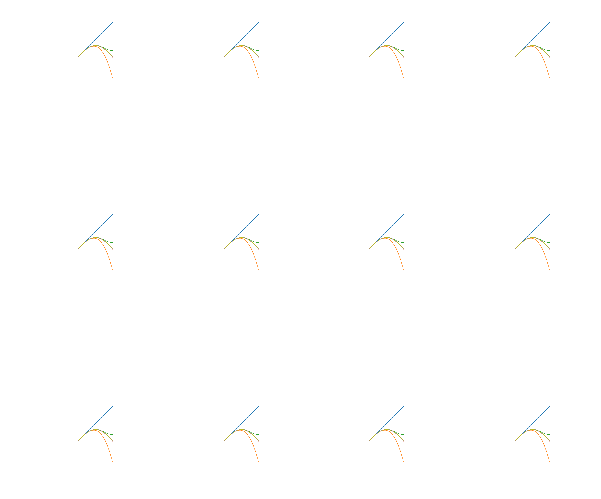

In [128]:
import imageio

fn = './tt.png'
im = imageio.imread(fn)

num_rows , num_cols = 3, 4

fig, axs = plt.subplots(num_rows, num_cols)
[axi.set_axis_off() for axi in axs.ravel()]
fig.set_size_inches(10,10)

for k in range(num_cols * num_rows):
    axs[k % num_rows , k // num_rows].imshow(im )
    
plt.axis('off');

## Flattening an ellipse

we can illustrate changes by using multiple plots
like this

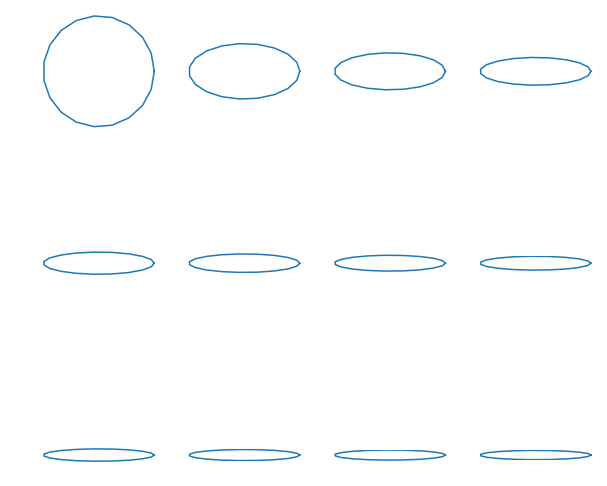

In [16]:
num_rows , num_cols = 3, 4

fig, axs = plt.subplots(num_rows, num_cols)

[ax.set_axis_off() for ax in axs.ravel()]
[ax.set_aspect('equal') for ax in axs.ravel()]

fig.set_size_inches(10,10)

# make a circle
T = np.linspace(0, 2*np.pi, 20)
X = np.cos(T)
Y = np.sin(T)

for k in range(num_cols * num_rows):
    axs[k // num_cols , k % num_cols].plot(X, Y/(k+1) )
    
plt.axis('off');

## Scatter plots

we often want to represent data as a cloud of points
to do this we use `plt.scatter'

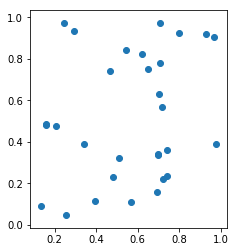

In [7]:
np.random.seed(19680801)

X, Y = np.random.rand(2, 30)

fig, ax = plt.subplots()
ax.scatter(X, Y,)
ax.set_aspect('equal')
plt.show()

## The marker

the blue dot is called the marker
we can change this by copying 
the [examples like this](https://matplotlib.org/gallery/lines_bars_and_markers/scatter_custom_symbol.html#sphx-glr-gallery-lines-bars-and-markers-scatter-custom-symbol-py).


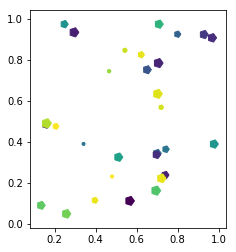

In [6]:
np.random.seed(19680801)

# pentagon
rx, ry = 1., 1.
area = rx * ry * np.pi
theta = np.linspace(0, 2 * np.pi + 0.01, 6)
verts = np.column_stack([rx / area * np.cos(theta), 
                         ry / area * np.sin(theta)])

x, y, s, c = np.random.rand(4, 30)
s *= 10**2.

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.scatter(x, y, s, c, marker=verts)
plt.show()

# Exercises

[ROMMA](https://www.romma.fr/) est une association bénévole à but non lucratif
qui tient des stations meteo dans la region.


---

Saint-Martin-d'Hères - (38, Isère)
 
Vallée du Grésivaudan (220 m)  Longitude: 05° 45' 05" E   Latitude: 45° 10' 02" N

Station partenaire n°4

https://www.romma.fr/station_24.php?id=4&tempe=1

---

I scrape the pages to get the raw weather data

you can see how I did it [here](https://github.com/macbuse/ROMMA/blob/master/romma_again.ipynb)

to do  the excercise you need to download these files
from the repository [here](https://github.com/macbuse/ROMMA).

13Aug.pkl  
19July.pkl  
20July.pkl  
21July.pkl
22July.pkl  
28July.pkl

These files contain dictionaries of measurements
the keys are the numbers of weather stations.

There is also a key for the times that the measurements were taken.

In [5]:
import pickle
data = pickle.load(open('./13Aug.pkl','rb'))

In [3]:
data.keys()

dict_keys([3, 5, 109, 44, 4, 6, 'times'])

In [63]:

data[4] #st martin d'heres

{'time': array([1.5946164e+12, 1.5946170e+12, 1.5946176e+12, ..., 1.5972900e+12,
        1.5972906e+12, 1.5972912e+12]),
 'temp': array([15.8, 15.9, 15.9, ...,  0. ,  0. ,  0. ]),
 'pluie': array([0., 0., 0., ..., 0., 0., 0.]),
 'intenspluie': array([nan, nan, nan, ...,  0.,  0.,  0.]),
 'pression': array([1019.4, 1019.4, 1019.4, ...,    0. ,    0. ,    0. ]),
 'hum': array([84., 85., 85., ...,  0.,  0.,  0.]),
 'rad': array([19., 20., 22., ...,  0.,  0.,  0.]),
 'rafale': array([0., 0., 0., ..., 0., 0., 0.]),
 'vent': array([0., 0., 0., ..., 0., 0., 0.]),
 'ventdir': array([nan, nan, nan, ...,  0.,  0.,  0.])}

In [64]:
#this is the time of day 
#for each of the first 10 observations
data['times'][:10]

array([7.        , 7.16666667, 7.33333333, 7.5       , 7.66666667,
       7.83333333, 8.        , 8.16666667, 8.33333333, 8.5       ])

In [65]:
data['times'].shape, data[5]['temp'].shape

((144,), (4464,))

In [37]:
4464 % 144, 4464//144

(0, 31.0)

so there are 31 days of temperature measurements.

you should always plot a graph 
to see what things look like.

you can see that there are problems

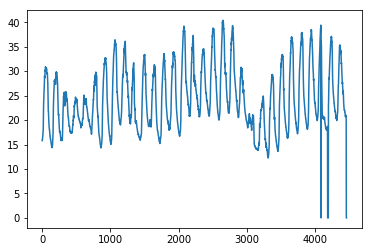

In [6]:
plt.plot(data[4]['temp']);

there is a problem with the first day
so we will skip the first 144 elements.


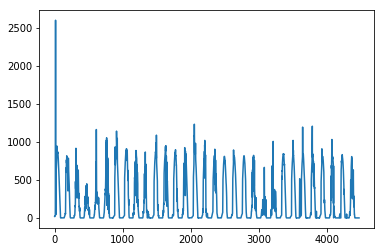

In [66]:
plt.plot(data[4]['rad']);

If you do it with a little loop
and put all the stations on the 
same figure then you can **easily** see that
1. The stations 4,5,6 are roughly the same
1. One is a bit cooler and also unreliable
1. One is a lot cooler

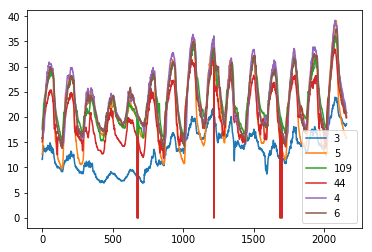

In [19]:
num_days = 15

for kk, dd in data.items():
    # use a test for being in the set/list
    if kk in ['times']: 
        #not a station
        continue 
    plt.plot(dd['temp'][:144*num_days], label=str(kk))
plt.legend();
    

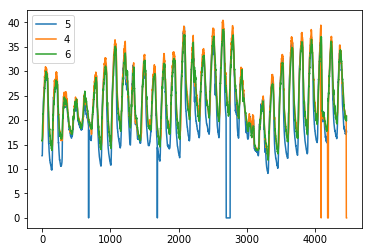

In [22]:
num_days = 31
for kk, dd in data.items():
    # use a test for being in the set/list
    if kk in ['times', 109, 44, 3]: 
        #not a station
        continue 
    plt.plot(dd['temp'][:144*num_days], label=str(kk))
plt.legend();

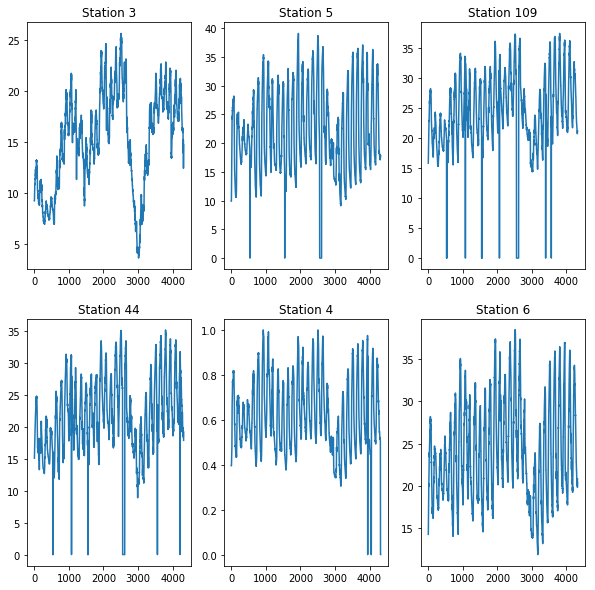

In [57]:
num_rows , num_cols = 2, 3
fig, axs = plt.subplots(num_rows, num_cols)

#[ax.set_axis_off() for ax in axs.ravel()]
#[ax.set_aspect('equal') for ax in axs.ravel()]

fig.set_size_inches(10,10)
for n, kk in enumerate(data.keys()):
    # use a test for being in the set/list
    if kk in ['times']: 
        #not a station
        continue 
    dd = data[kk]
    ax = axs[n // num_cols , n % num_cols]
    ax.plot(dd['temp'][144:144*num_days])
    ax.set_title('Station ' + str(kk))


## compare sun and temp

The units are different so we have to normalize the data

- divide by the maximum

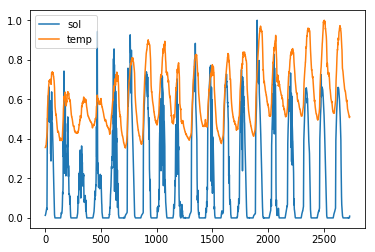

In [72]:
# compare sun and temp

stat = data[4]
# I don't want to modify the original data
S = np.copy(stat['rad'][144:20*144])
T  = np.copy(stat['temp'][144:20*144])
# Do the normalization
S /= max(S)
T /= max(T)
plt.plot(S,label='sol')
plt.plot(T,label='temp')
plt.legend();

## a better way ?

To learn more look [here](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py)


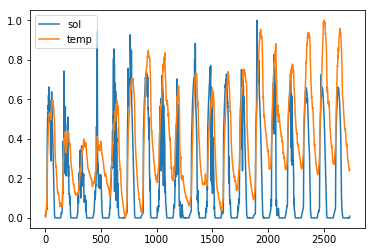

In [73]:
stat = data[4]
S = np.copy(stat['rad'][144:20*144])
T  = np.copy(stat['temp'][144:20*144])
S = (S - min(S))/ (max(S) - min(S)) 
T = (T - min(T))/ (max(T) - min(T)) 
plt.plot(S,label='sol')
plt.plot(T,label='temp')
plt.legend();

In [76]:
T = data[4]['temp']
T.shape

(4464,)

In [80]:
T_days = T.reshape(31,144)

temperure 7h -7h for first 24 hours

## fixing times

we started at 7h but 
we want to start at 00h

when we draw the graph
there is a line that shouldn't be there

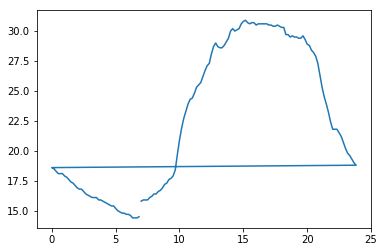

In [102]:
plt.plot(data['times'], T_days[0]);

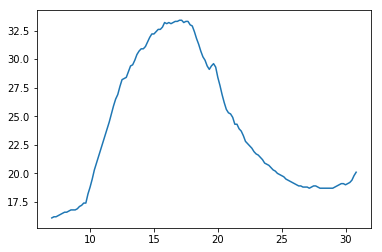

In [122]:
TT = np.roll(data['times'], 6*7)
plt.plot(TT + 7, T_days[10]);

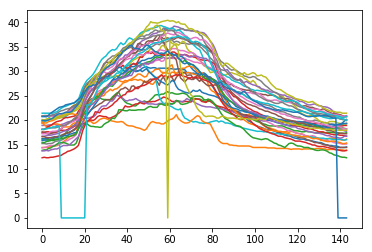

In [115]:
for day in T_days:
    plt.plot(day)

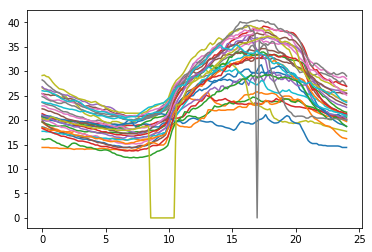

In [139]:
TT = T[144 - 6*7: 31 * 144 - 6*7]
TT.shape[0] / 144

month = TT.reshape(30,144)
for day in month:
    plt.plot(np.linspace(0,24,6*24), day)

## maximum temperature for a month

this is easy to get but 
what we want is the max temp for each day.

In [141]:
np.max(month)

40.4

## max/min temperature for a day

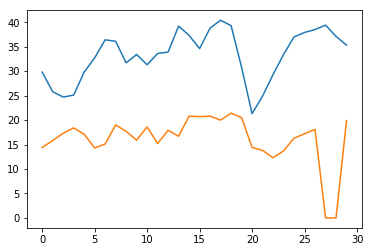

In [145]:
plt.plot(np.max(month,axis=1));
plt.plot(np.min(month,axis=1));

## Are they related ?

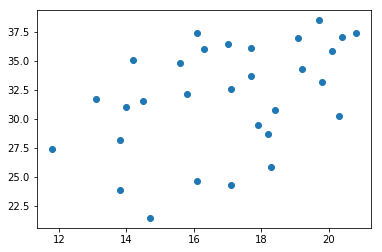

In [21]:
plt.scatter(np.min(month,axis=1), 
            np.max(month,axis=1));

## What about at 7h and max ?

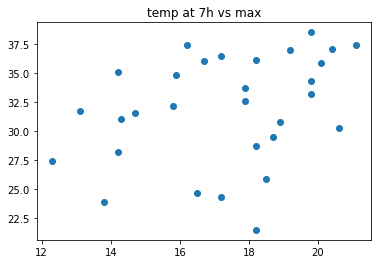

In [38]:
tt = 7
plt.scatter( month[:, tt*6],
            np.max(month,axis=1))
plt.title('temp at {}h vs max'.format(tt));

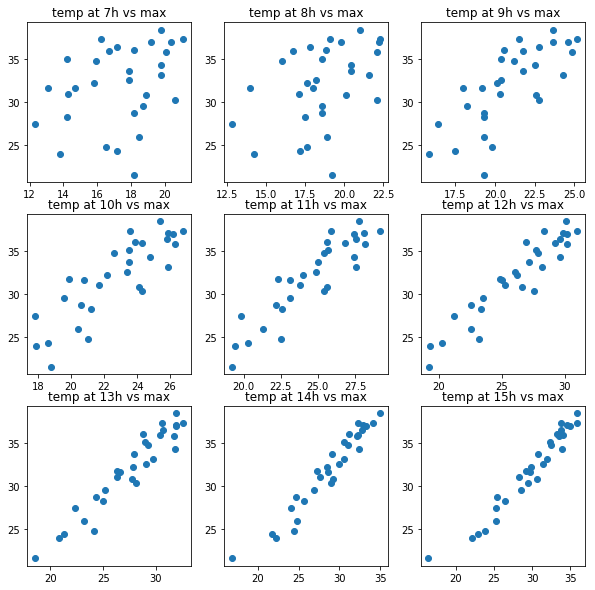

In [34]:
num_rows , num_cols = 3, 3
fig, axs = plt.subplots(num_rows, num_cols)

fig.set_size_inches(10,10)
for hh in range(7,16):
    n = hh - 7
    ax = axs[ n // num_cols , n % num_cols]
    ax.scatter( month[:, hh*6],
                 np.max(month,axis=1))
    ax.set_title('temp at {}h vs max'.format(hh));


## average temperature

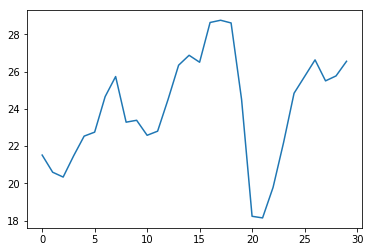

In [22]:
plt.plot(np.mean(month, axis=1));

# Solution to exo

Find the time when it was hottest for each station.

The first thing to do is find the index in the table row.

In [156]:
for day in month[:10]:
    print( np.where( day == max(day)))

(array([103, 106, 107]),)
(array([101]),)
(array([99]),)
(array([77]),)
(array([109]),)
(array([102, 105, 109]),)
(array([103]),)
(array([108]),)
(array([87, 88]),)
(array([102, 103]),)


# fancy indexing

there is a clever trick to get the times

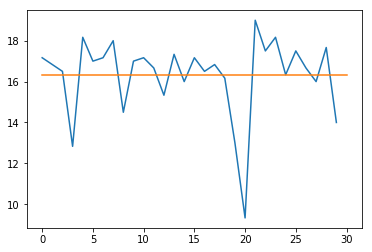

In [165]:
indices = [np.where( day == max(day))[0][0] 
                 for day in month]

hottest_time = np.linspace(0,24,144 + 1)[indices] 

plt.plot(hottest_time)
av = np.average(hottest_time)
plt.plot([0,30], [av,av]);

## Complete solution

In [15]:
time_of_day = np.linspace(0,24,144 + 1)
#this might not work test it
start_index = int(data['times'][0]*6)
stations = {}

for kk, stuff in data.items():
    # skip this, not a station
    if kk in ['times']: continue
    # get 30 days  
    TT = stuff['temp'][144-start_index: 31*144 - start_index]
    month = TT.reshape(30,144)
    
    indices = [np.where( day == max(day))[0][0] 
                     for day in month]
    
    hottest_times = time_of_day[indices] 
    stations[kk] = hottest_times

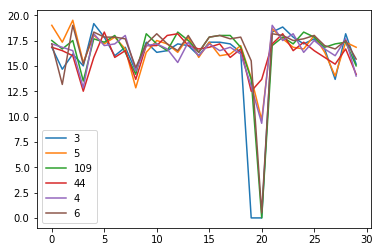

In [17]:
for kk, times in stations.items():
    plt.plot(times, label=kk)
plt.legend();

In [37]:
! ../.g

[master 0bdce89] web
 1 file changed, 24 insertions(+), 21 deletions(-)
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 4 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 645 bytes | 58.00 KiB/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/macbuse/macbuse.github.io
   713bf19..0bdce89  master -> master


In [15]:
data[3] # which station is this ?

{'time': array([1.5946164e+12, 1.5946170e+12, 1.5946176e+12, ..., 1.5972930e+12,
        1.5972936e+12, 1.5972942e+12]),
 'temp': array([11.6, 11.6, 11.8, ..., 13.8, 14.2, 14.7]),
 'pluie': array([0., 0., 0., ..., 0., 0., 0.]),
 'intenspluie': array([nan, nan, nan, ..., nan, nan, nan]),
 'pression': array([1017. , 1017. , 1017. , ..., 1011.1, 1011.1, 1011. ]),
 'hum': array([90., 90., 90., ..., 66., 64., 62.]),
 'rad': array([ 27. ,  30.5, 150. , ...,   0. ,   0.5,   6.5]),
 'rafale': array([nan, nan, nan, ..., nan, nan, nan]),
 'vent': array([nan, nan, nan, ..., nan, nan, nan]),
 'ventdir': array([nan, nan, nan, ..., nan, nan, nan])}

# Exercise 

1. Display the temperature and humidity for each station
1. Find the time when it was hottest for each station
1. Use ```scipy.stats.linregress``` to investigate
the relation between temperature and humidity
1. Are the other measurements related ?
1. Explore https://matplotlib.org/gallery/index.html
and find different ways of displaying the data



In [22]:
from scipy.stats import linregress

In [23]:
import matplotlib.animation as animation
?linregress

Signature: linregress(x, y=None)
Docstring:
Calculate a linear least-squares regression for two sets of measurements.

Parameters
----------
x, y : array_like
    Two sets of measurements.  Both arrays should have the same length.
    If only x is given (and y=None), then it must be a two-dimensional
    array where one dimension has length 2.  The two sets of measurements
    are then found by splitting the array along the length-2 dimension.

Returns
-------
slope : float
    slope of the regression line
intercept : float
    intercept of the regression line
rvalue : float
    correlation coefficient
pvalue : float
    two-sided p-value for a hypothesis test whose null hypothesis is
    that the slope is zero, using Wald Test with t-distribution of
    the test statistic.
stderr : float
    Standard error of the estimated gradient.

See also
--------
:func:`scipy.optimize.curve_fit` : Use non-linear
 least squares to fit a function to data.
:func:`scipy.optimize.leastsq` : Minimize t

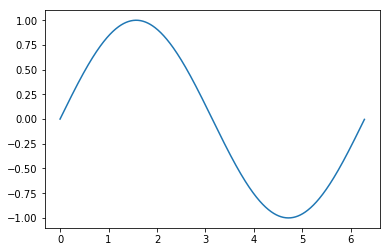

In [23]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i / 50))  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=20, blit=True, save_count=50)